In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation,BatchNormalization
from keras.optimizers import SGD
from keras.layers import Conv2D, MaxPool2D
from keras import backend as K
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Pre-processing
x_train = x_train.reshape(-1,32,32,3)
x_test = x_test.reshape(-1, 32,32,3)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [4]:
batch_size = 128
num_classes = 10
epochs = 100

In [5]:
# convert class vectors to binary class matrices
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


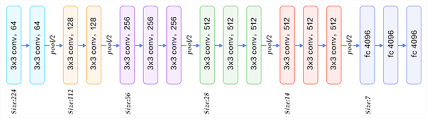

In [7]:
model = Sequential()

# 2 layers conv 64
model.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# 2 layers conv 128
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# 2 layers con 256
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# 3 layers conv 512
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# 3 layers conv 512
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

# 3 layers fc 4096
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=num_classes, activation="softmax"))

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/100
391/391 [==============================] - 29s 74ms/step - loss: 1.9977 - accuracy: 0.2356 - val_loss: 2.7372 - val_accuracy: 0.1662
Epoch 2/100
391/391 [==============================] - 28s 73ms/step - loss: 1.4405 - accuracy: 0.4522 - val_loss: 1.3780 - val_accuracy: 0.5150
Epoch 3/100
391/391 [==============================] - 28s 72ms/step - loss: 1.0897 - accuracy: 0.6217 - val_loss: 1.0900 - val_accuracy: 0.6488
Epoch 4/100
391/391 [==============================] - 28s 72ms/step - loss: 0.8707 - accuracy: 0.7080 - val_loss: 1.2765 - val_accuracy: 0.6227
Epoch 5/100
391/391 [==============================] - 28s 72ms/step - loss: 0.7418 - accuracy: 0.7548 - val_loss: 0.9454 - val_accuracy: 0.7126
Epoch 6/100
391/391 [==============================] - 28s 72ms/step - loss: 0.6398 - accuracy: 0.7924 - val_loss: 1.2547 - val_accuracy: 0.6559
Epoch 7/100
391/391 [==============================] - 28s 72ms/step - loss: 0.5561 - accuracy: 0.8204 - val_loss: 0.7815 - val_ac

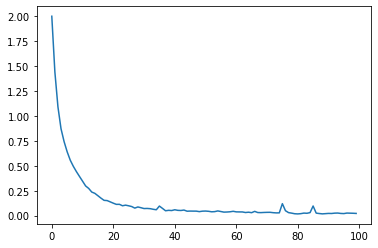

In [10]:
plt.plot(H.history['loss'])
plt.show()